# Plot surface maps

Compare coupled model with ocean-only model and WOA13 observations.

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean as cm
import matplotlib.gridspec as gridspec
%matplotlib inline

# Stop annoying warnings coming out of xarray.
import warnings
warnings.filterwarnings('ignore')

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35771,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:40585,Total threads: 4
Dashboard: /proxy/43829/status,Memory: 17.89 GiB
Nanny: tcp://127.0.0.1:44547,


In [3]:
# CM2 database
session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
expt_CM2_025 = 'cj877'
expt_CM2_1   = 'bz687'

In [4]:
# OM2 database
session_OM2  = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt_OM2_025 = '025deg_jra55_ryf9091_gadi'
expt_OM2_1   = '1deg_jra55_ryf9091_gadi'

In [5]:
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'

If you get a 'read-only database' warning, it is because the database has not finished building. 

In [6]:
# Plotting info
ft_size = 16
plt.rcParams.update({'font.size': ft_size})
fig_path = '/g/data/x77/wgh581/Figures/Figures_ACCESS_CM2/'

### Load data

Model data

In [7]:
start_time = '0400-01-01'
end_time   = '0499-12-31'

In [8]:
SST_CM2_025 = xr.open_dataarray(path_to_data + 'SST_global_annual.nc')
SST_CM2_025 = SST_CM2_025.sel(time=slice(start_time, end_time)).mean('time')

In [9]:
SST_CM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/SST_CM2_1_annual.nc')
SST_CM2_1 = SST_CM2_1.sel(time=slice(start_time, end_time)).mean('time')

In [10]:
SST_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/SST_OM2_025_annual.nc')
SST_OM2_025 = SST_OM2_025.sel(time=slice('2300-01-01', '2399-12-31')).mean('time')

In [11]:
SSS_CM2_025 = xr.open_dataarray(path_to_data + 'SSS_global_annual_400_499.nc')
SSS_CM2_025 = SSS_CM2_025.mean('time')

SSS_CM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/SSS_CM2_1_annual_400_499.nc')
SSS_CM2_1 = SSS_CM2_1.mean('time')

SSS_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/SSS_OM2_025_annual_2300_2399.nc')
SSS_OM2_025 = SSS_OM2_025.mean('time')

WOA13 observations

In [12]:
WOA13_025 = xr.open_mfdataset('/g/data/ik11/observations/woa13/025_KDS50/woa13_ts_??_mom025.nc')
WOA13_025 = WOA13_025.rename({'GRID_Y_T': 'yt_ocean', 'GRID_X_T': 'xt_ocean', 'ZT': 'st_ocean'})
WOA13_025['yt_ocean'] = SST_CM2_025.yt_ocean
WOA13_025 = WOA13_025.mean('time').sel(st_ocean=0, method='nearest')
WOA13_025_temp = WOA13_025.temp.load()
WOA13_025_salt = WOA13_025.salt.load()

In [13]:
WOA13_1 = xr.open_mfdataset('/g/data/ik11/observations/woa13/10_KDS50/woa13_ts_??_mom10.nc')
WOA13_1 = WOA13_1.rename({'GRID_Y_T': 'yt_ocean', 'GRID_X_T': 'xt_ocean', 'ZT': 'st_ocean'})
WOA13_1['yt_ocean'] = SST_CM2_1.yt_ocean
WOA13_1 = WOA13_1.mean('time').sel(st_ocean=0, method='nearest')
WOA13_1_temp = WOA13_1.temp.load()
WOA13_1_salt = WOA13_1.salt.load()

Calculate anomalies

In [14]:
temp_anom_CM2_025 = SST_CM2_025-WOA13_025_temp
temp_anom_CM2_025 = temp_anom_CM2_025.where(temp_anom_CM2_025>-100, np.nan)

temp_anom_OM2_025 = SST_OM2_025-WOA13_025_temp
temp_anom_OM2_025 = temp_anom_OM2_025.where(temp_anom_OM2_025>-100, np.nan)

temp_anom_CM2_1 = SST_CM2_1-WOA13_1_temp
temp_anom_CM2_1 = temp_anom_CM2_1.where(temp_anom_CM2_1>-100, np.nan)

In [15]:
salt_anom_CM2_025 = SSS_CM2_025-WOA13_025_salt
salt_anom_CM2_025 = salt_anom_CM2_025.where(SSS_CM2_025!=0, np.nan)

salt_anom_OM2_025 = SSS_OM2_025-WOA13_025_salt
#salt_anom_OM2_025 = salt_anom_OM2_025.where(salt_anom_OM2_025<10, np.nan)

salt_anom_CM2_1 = SSS_CM2_1-WOA13_1_salt
#salt_anom_CM2_1 = salt_anom_CM2_1.where(salt_anom_CM2_1<10, np.nan)

Coordinate information

In [16]:
geolon_t = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolon_t
geolat_t = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolat_t

In [17]:
geolon_t_1 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc').geolon_t
geolat_t_1 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc').geolat_t

In [18]:
temp_anom_CM2_025 = temp_anom_CM2_025.assign_coords({'geolon_t': geolon_t, 'geolat_t': geolat_t})
temp_anom_OM2_025 = temp_anom_OM2_025.assign_coords({'geolon_t': geolon_t, 'geolat_t': geolat_t})

temp_anom_CM2_1   = temp_anom_CM2_1.assign_coords({'geolon_t': geolon_t_1, 'geolat_t': geolat_t_1})

In [19]:
salt_anom_CM2_025 = salt_anom_CM2_025.assign_coords({'geolon_t': geolon_t, 'geolat_t': geolat_t})
salt_anom_OM2_025 = salt_anom_OM2_025.assign_coords({'geolon_t': geolon_t, 'geolat_t': geolat_t})

salt_anom_CM2_1   = salt_anom_CM2_1.assign_coords({'geolon_t': geolon_t_1, 'geolat_t': geolat_t_1})

### Plotting

In [20]:
import cartopy.feature as cft

land_50m = cft.NaturalEarthFeature('physical', 'land', '50m', edgecolor='black', facecolor='darkgrey', linewidth=0.5)

Temperature

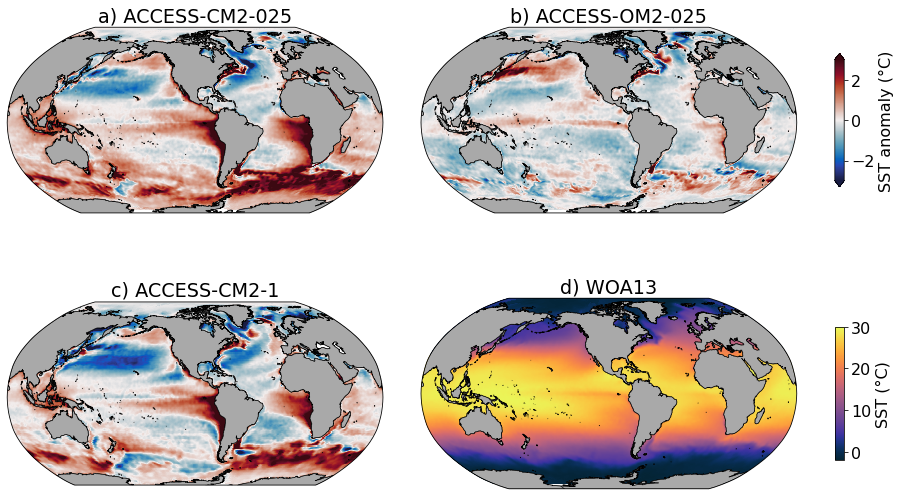

In [128]:
fig = plt.figure(figsize=(15,10))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=0.05, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = temp_anom_CM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-3, vmax=3, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('a) ACCESS-CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
temp_anom_OM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-3, vmax=3, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('b) ACCESS-OM2-025')

cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='SST anomaly (°C)', extend='both')

ax = fig.add_subplot(gs[4:,0], projection=ccrs.Robinson(central_longitude=-100))
temp_anom_CM2_1.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-3, vmax=3, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('c) ACCESS-CM2-1')

ax = fig.add_subplot(gs[4:,1], projection=ccrs.Robinson(central_longitude=-100))
sc = WOA13_025_temp.plot(x='xt_ocean', y='yt_ocean', transform=ccrs.PlateCarree(), vmin=-2, vmax=30, cmap=cm.cm.thermal, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('d) WOA13')

cbar_ax = fig.add_subplot(gs[5:7, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='SST (°C)')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_SST_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300);

Salinity

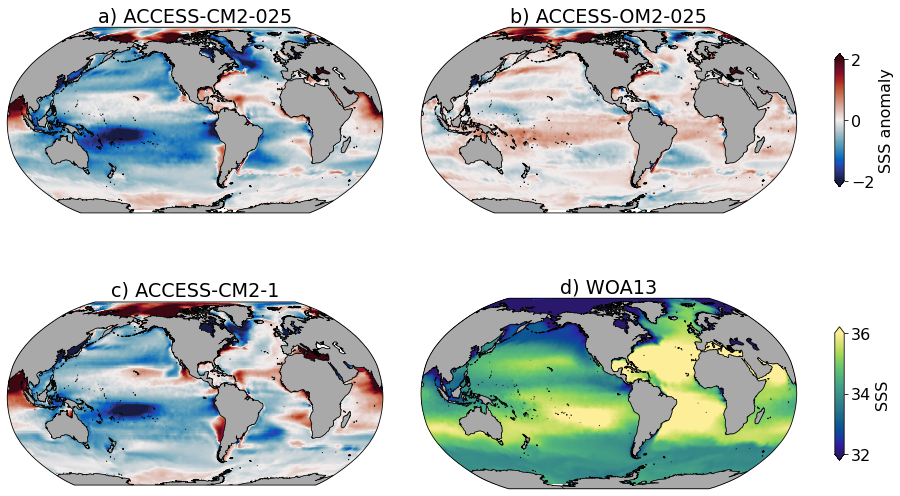

In [129]:
fig = plt.figure(figsize=(15,10))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=0.05, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = salt_anom_CM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('a) ACCESS-CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
salt_anom_OM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('b) ACCESS-OM2-025')

cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='SSS anomaly', extend='both')

ax = fig.add_subplot(gs[4:,0], projection=ccrs.Robinson(central_longitude=-100))
salt_anom_CM2_1.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('c) ACCESS-CM2-1')

ax = fig.add_subplot(gs[4:,1], projection=ccrs.Robinson(central_longitude=-100))
sc = WOA13_025_salt.plot(x='xt_ocean', y='yt_ocean', transform=ccrs.PlateCarree(), vmin=32, vmax=36, cmap=cm.cm.haline, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('d) WOA13')

cbar_ax = fig.add_subplot(gs[5:7, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='SSS', extend='both')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_SSS_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300);

### Global mean values

CLEX colours

In [21]:
CLEX_Red = '#DA1E48'
CLEX_Pink = '#F48580'
CLEX_SkyBlue = '#00BDF2'
CLEX_MidBlue = '#008DD0'
CLEX_CobaldBlue = '#0066B3'
CLEX_MidnightBlue = '#113559'
CLEX_Gray = '#4D4D47'

CLEX_Yellow = '#D9B252'
CLEX_Green1 = '#51AA62'
CLEX_Green2 = '#346D53'

Load OM2 1 data

In [22]:
SST_OM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/SST_OM2_1_annual.nc')
SST_OM2_1 = SST_OM2_1.sel(time=slice('2300-01-01', '2399-12-31')).mean('time')

#### Global mean temperature, online

In [76]:
def get_scalar_timeseries(expt, session, var, start_time=start_time, end_time=end_time, frequency='1 daily'):
    data = cc.querying.getvar(expt, var, session, start_time=start_time, end_time=end_time, frequency=frequency)
    data = data.sel(time=slice(start_time, end_time)).resample(time='Y').mean()
    data = data.load()
    
    return data

In [ ]:
%%time  # 3 min
SST_online_CM2_025 = get_scalar_timeseries(expt_CM2_025, session_CM2, 'temp_surface_ave', start_time=start_time, end_time='0499-12-31')

In [ ]:
%%time
SST_online_CM2_1 = get_scalar_timeseries(expt_CM2_1, session_CM2, 'temp_surface_ave', start_time=start_time, end_time=end_time, frequency='1 monthly')

In [ ]:
%%time
SST_online_OM2_1 = get_scalar_timeseries(expt_OM2_1, session_OM2, 'temp_surface_ave', start_time='2300-01-01', end_time='2399-12-31', frequency='1 monthly')

In [ ]:
%%time
SST_online_OM2_025 = get_scalar_timeseries(expt_OM2_025, session_OM2, 'temp_surface_ave', start_time='2300-01-01', end_time='2399-12-31', frequency='1 monthly')

In [106]:
print('Global mean temp, online')
print('CM2-025 = ', np.round(SST_online_CM2_025.mean('time')[0].values, 2))
print('CM2-1 = ', np.round(SST_online_CM2_1.mean('time')[0].values, 2))
print('OM2-025 = ', np.round(SST_online_OM2_025.mean('time')[0].values, 2))
print('OM2-1 = ', np.round(SST_online_OM2_1.mean('time')[0].values, 2))

Global mean temp, online
CM2-025 =  18.74
CM2-1 =  18.41
OM2-025 =  18.11
OM2-1 =  18.14


#### Global mean temperature, offline

`sum(temp*area_t) / sum(area_t)`, where `sum(var)` is `var.sum('xt_ocean').sum('yt_ocean')`

In [35]:
def calc_mean_offline(data_t, area):
    
    spatial_mean = (data_t*area).sum('xt_ocean').sum('yt_ocean') / area.sum('xt_ocean').sum('yt_ocean')
    
    return spatial_mean.compute()

In [42]:
area_t_25 = cc.querying.getvar(expt_OM2_025, 'area_t', session_OM2, n=1).load()
area_t_1  = cc.querying.getvar(expt_OM2_1, 'area_t', session_OM2, n=1).load()

In [90]:
SST_CM2_1['yt_ocean'] = area_t_1.yt_ocean.values

In [94]:
temp_mean_CM2_025_offline = calc_mean_offline(SST_CM2_025, area_t_25)
temp_mean_CM2_1_offline = calc_mean_offline(SST_CM2_1, area_t_1)
temp_mean_OM2_025_offline = calc_mean_offline(SST_OM2_025, area_t_25)
temp_mean_OM2_1_offline = calc_mean_offline(SST_OM2_1, area_t_1)

In [95]:
print('Global mean temperature, offline')
print('CM2-025: ', np.round(temp_mean_CM2_025_offline.values, 2))
print('CM2-1: ', np.round(temp_mean_CM2_1_offline.values, 2))
print('OM2-025: ', np.round(temp_mean_OM2_025_offline.values, 2))
print('OM2-1: ', np.round(temp_mean_OM2_1_offline.values, 2))

Global mean temperature, offline
CM2-025:  15.91
CM2-1:  14.03
OM2-025:  15.38
OM2-1:  13.84


In [99]:
WOA13_025_offline = calc_mean_offline(WOA13_025_temp, area_t_25)
print('WOA13, 025: ', np.round(WOA13_025_offline.values, 2))

WOA13, 025:  18.2


→ Global average temperature calculated offline are much lower than the ones calculated online. Why is that?

The offline calculated WOA13 global mean temperature seems to be correct (match the online global mean temperature).

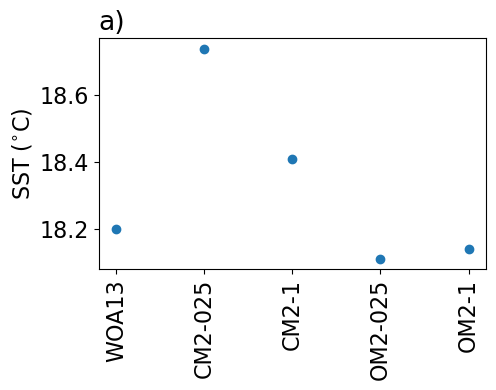

In [111]:
fig = plt.figure(figsize=(5,3))

plt.title('a)', loc='left')
plt.scatter([1,2,3,4,5], [18.2, 18.74, 18.41, 18.11, 18.14])
plt.ylabel('SST ($^{\circ}$C)')
plt.xticks(ticks=[1,2,3,4,5], labels=['WOA13', 'CM2-025', 'CM2-1', 'OM2-025', 'OM2-1'], rotation=90);

True zonal mean

In [23]:
from xhistogram.xarray import histogram

In [ ]:
#Define the coordinate bins as the latitude edges of the T-cells
yu_ocean = cc.querying.getvar(expt_OM2_025, 'yu_ocean', session_OM2, n=1)
# #make numpy array (using .values) and add 1st edge at -90
bins =  np.insert(yu_ocean.values, 0, np.array(-90), axis=0) 

# #Alternatively we could just use some regular grid like this 
# #coordbins =  np.linspace(-80, 90, 50)
# #or use a grid from a different (coarser) model.

dzt = cc.querying.getvar(expt_OM2_025, 'dzt', session_OM2, ncfile='ocean.nc') #thickness of cells
area_t = cc.querying.getvar(expt_OM2_025, 'area_t', session_OM2, n=1) #area of cells

dVol = dzt * area_t #Volume of cells


In [28]:
dVol = dVol[-1,...]
dVol

In [46]:
dVol_sfc = dVol[-1,...]
dVol_sfc

<xarray.DataArray (yt_ocean: 1080, xt_ocean: 1440)>
dask.array<getitem, shape=(1080, 1440), dtype=float32, chunksize=(216, 288), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean  (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.74 89.84 89.95
    st_ocean  float64 5.254e+03
    time      object 2549-12-16 12:00:00
    geolon_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    geolat_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>

In [50]:
def get_zonal_mean(geolat, dVol, bins, data):
    a = histogram(geolat.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
    b = histogram(geolat.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins], weights=dVol * data, dim=['yt_ocean', 'xt_ocean'])
    
    zonal_mean = (b/a)
    
    return zonal_mean

In [51]:
SST_CM2_025_zm = get_zonal_mean(geolat_t, dVol_sfc, bins, SST_CM2_025)

In [53]:
SST_OM2_025_zm = get_zonal_mean(geolat_t, dVol_sfc, bins, SST_OM2_025)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


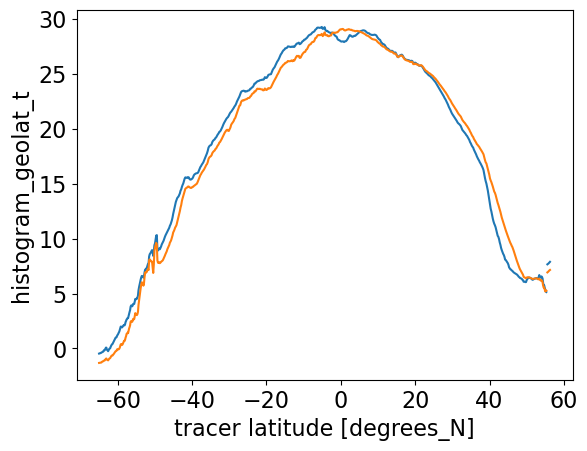

In [54]:
SST_CM2_025_zm.plot()
SST_OM2_025_zm.plot()

In [58]:
SST_CM2_025_zm.mean('geolat_t_bin').values

array(16.454445, dtype=float32)

In [61]:
my_mean = (SST_CM2_025 * area_t).sum('xt_ocean').sum('yt_ocean') / area_t.sum('xt_ocean').sum('yt_ocean')

In [63]:
my_mean.values

array(15.910867, dtype=float32)

In [67]:
# Meridional mean
xu_ocean = cc.querying.getvar(expt_OM2_025, 'xu_ocean', session_OM2, n=1)
bins_merid = xu_ocean.values 

In [ ]:
def get_merid_mean():
    
    a = histogram(geolon.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins_merid], weights=dVol, dim=['yt_ocean', 'xt_ocean'])
    b = histogram(geolon.broadcast_like(dVol).where(~np.isnan(dVol)), bins=[bins_merid], weights=dVol * SST_CM2_025_zm, dim=['yt_ocean', 'xt_ocean'])
    
    zonal_mean = (b/a)
    
    return zonal_mean

In [70]:
dVol_sfc

<xarray.DataArray (yt_ocean: 1080, xt_ocean: 1440)>
dask.array<getitem, shape=(1080, 1440), dtype=float32, chunksize=(216, 288), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yt_ocean  (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.74 89.84 89.95
    st_ocean  float64 5.254e+03
    time      object 2549-12-16 12:00:00
    geolon_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>
    geolat_t  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(540, 720), meta=np.ndarray>

Zonal mean temperature

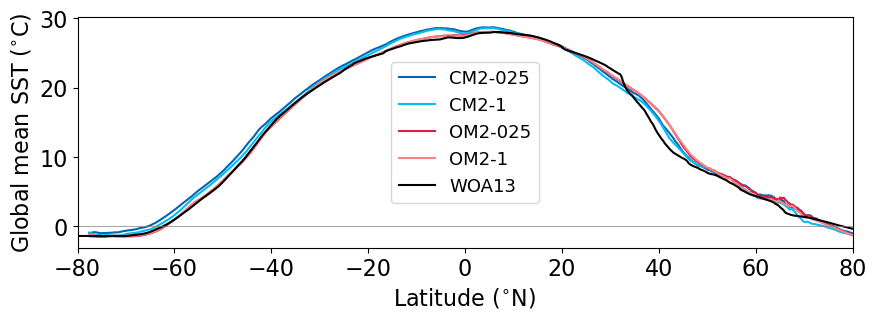

In [73]:
fig = plt.figure(figsize=(10,3))

SST_CM2_025.where(SST_CM2_025>-200, np.nan).mean('xt_ocean').plot(color=CLEX_CobaldBlue, label='CM2-025')
SST_CM2_1.mean('xt_ocean').plot(color=CLEX_SkyBlue, label='CM2-1')
SST_OM2_025.mean('xt_ocean').plot(color=CLEX_Red, label='OM2-025')
SST_OM2_1.mean('xt_ocean').plot(color=CLEX_Pink, label='OM2-1')
WOA13_025_temp.mean('xt_ocean').plot(color='k', label='WOA13')
plt.legend(ncol=1, fontsize=13)
plt.axhline(0, color='0.5', linewidth=0.5)
plt.title('')
plt.ylabel('Global mean SST ($^{\circ}$C)')
plt.xlabel('Latitude ($^{\circ}$N)')
plt.xlim(-80, 80);

Things to note:
- Forced model closer to observations
- Resolution has less effect than prescribed atmosphere
- Weird kink in WOA18 at approx 35N
- Coupled model is more symmetric around the hemispheres

In [75]:
print('Global mean SST')
print('CM-025 =', np.round(SST_CM2_025.where(SST_CM2_025>-200, np.nan).mean('xt_ocean').mean('yt_ocean').values,2))
print('CM-1 =', np.round(SST_CM2_1.mean('xt_ocean').mean('yt_ocean').values,2))
print('OM-025 =', np.round(SST_OM2_025.mean('xt_ocean').mean('yt_ocean').values,2))
print('OM-1 =', np.round(SST_OM2_1.mean('xt_ocean').mean('yt_ocean').values,2))
print('WOA13 =', np.round(WOA13_025_temp.mean('xt_ocean').mean('yt_ocean').values,2))

Global mean SST
CM-025 = 10.24
CM-1 = 13.34
OM-025 = 9.8
OM-1 = 13.16
WOA13 = 9.29


For the global average, the higher res models look better than the lower res models. That is weird, because the profile above suggests the difference is in the models and not the resolution. 

Is this a calculation problem with the mean function?

To double-check, load in the global mean temperature calculated online:

Text(0.5, 1.0, 'a) ACCESS-CM2-025')

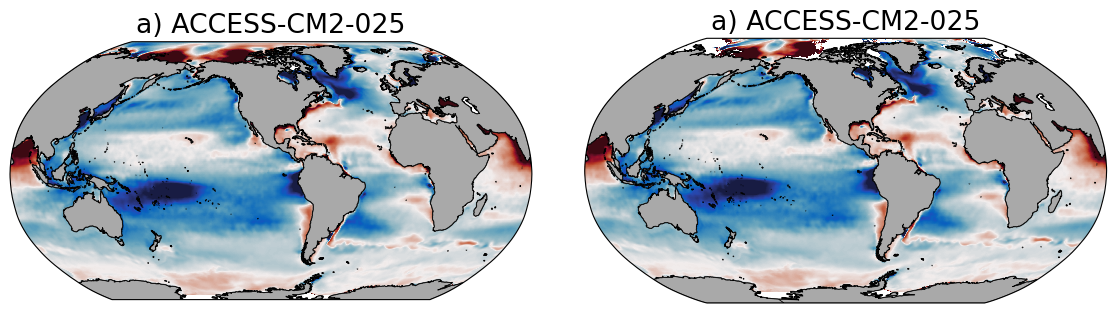

In [110]:
fig = plt.figure(figsize=(15,10))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=0.05, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = salt_anom_CM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('a) ACCESS-CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
sc = salt_anom_CM2_025.plot(transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('a) ACCESS-CM2-025')

In [111]:

test = SST_OM2_025.assign_coords({'geolat_t': geolat_t, 'geolon_t': geolon_t})


In [113]:
test.mean('geolon_t')

ValueError: 'geolon_t' not found in array dimensions ('yt_ocean', 'xt_ocean')